In [ ]:
"""
A simple example of a batch gradient descent with a learning rate.
"""


In [5]:
#Load libraries
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Define learning rate function

def learning_rate(t,t0=1,t1=100):
    """
    Learning rate function
    #Arguments
    t, int: current learning rate time step which is modelled based on the epoch
    t0, int: baseline learning rate, set to 1 as a default
    t1 int: baseline learning rate to scale, set to 100 as a default
    #Returns
    """
    return t0/(t+t1)

In [7]:
def Gradient(X,ypred,y):
    """
    Gradient function
    
    NOTE Tensorflow has separate functionalities to implement gradient calculation and tracking

    #Arguments

    X, array(int/float): sample values
    y, array(int/float): actual values
    ypred, array(int/float): prediced values

    #Returns
    Jacobian for the gradient with respect to theta
    """
    grad=2*np.dot(X.T,(ypred-y))/len(X) #MSE grad with respect ypred theta
    return grad

[[ 0.20237327  1.        ]
 [-0.0188193   1.        ]
 [ 0.2257519   1.        ]
 [-0.7323249   1.        ]
 [ 1.03461719  1.        ]
 [ 0.0742465   1.        ]
 [-0.12638649  1.        ]
 [ 1.35821009  1.        ]
 [ 0.7497235   1.        ]]
[[-26.52031597]
 [ -2.52459954]
 [-13.24779759]
 [-41.22353567]
 [ 46.06503956]
 [-10.00982207]
 [-28.70055764]
 [ 86.47353325]
 [ 41.53195203]]


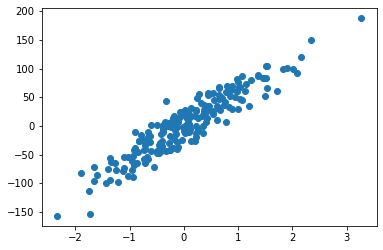

In [8]:
#Generate test data for a simple linear model
from sklearn.datasets import make_regression

X,y=make_regression(n_samples=200, n_features=1, n_informative=1, n_targets=1, noise=20)
X=np.c_[X,np.ones((200,1))]
y=y.reshape(200,1)
print(X[1:10])
print(y[1:10])

plt.scatter(X[:,0],y)
plt.show()

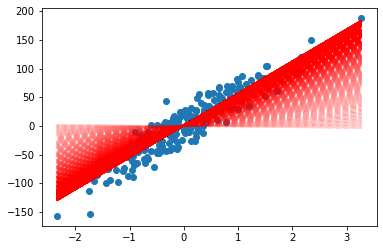

In [9]:
EPOCHS=1000
theta=np.random.randn(2,1) #for a simple linear regression with slope k and b intercept

plt.scatter(X[:,0],y)
for epoch in range(1,EPOCHS):

    #Calculate and update gradient
    ypred=np.dot(X,theta)
    
    grad=Gradient(X,ypred,y,theta)
    lr=learning_rate(epoch)
    theta=theta-grad*lr

    #visualise epoch fitting
    if epoch>0:
        
        yplot=np.dot(X,theta)
        plt.plot(X[:,0],yplot,'--r',alpha=0.2)
plt.show()